<a href="https://colab.research.google.com/github/kojiyam/information-transmission-engineering/blob/main/jd3_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 標本化・量子化

# 標本化

https://tomari.org/main/java/oto.html 音階の周波数

In [24]:
import numpy as np
np.random.seed(1) # 乱数のseedを固定

import matplotlib.pyplot as plt
plt.style.use('dark_background') # for dark-mode
plt.rcParams["font.size"] = 16

import IPython.display

In [3]:
sampling_rate1 = 48e3 # (Hz) 音として出力するための標本化周波数
sampling_rate2 = 3e3 # (Hz) 音として出力するための標本化周波数

In [13]:
# 標本化時刻
T = 0.4 # (s) 1音の時間長
T_LENGTH = T * 25
t1 = np.arange( T_LENGTH * sampling_rate1 ) / sampling_rate1 # 標本化時刻
t2 = np.arange( T_LENGTH * sampling_rate2 ) / sampling_rate2 # 標本化時刻

$ 523 \cdot 2^{n/12} \,\mathrm{Hz} $, $n=0,1,\dots$

In [5]:
# ドレミを作っているだけ
# 1オクターブは2倍で、1オクターブの間をログスケールで12等分したうちの7つがドレミファソラシ
aa = np.array([0,2,4,5,7,9,11])
ab = aa+12
ac = aa+24
ad = aa+36
a = np.concatenate((aa,ab,ac,ad))
def freq_r( x ):
  return a[x]
freq_r_v = np.vectorize(freq_r)

Text(0.5, 0, '$t$ (s)')

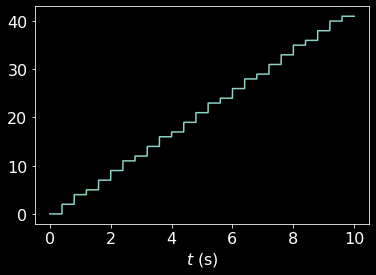

In [6]:
a1 = (np.floor(t1/T)).astype('int32')
a2 = (np.floor(t2/T)).astype('int32')
plt.plot(t1,freq_r_v(a1))
plt.xlabel("$t$ (s)")

Text(0, 0.5, 'Frequency (Hz)')

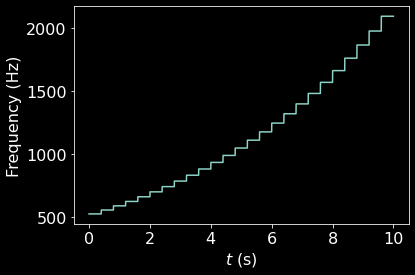

In [7]:
f1 = 523*(2**(a1/12))
f2 = 523*(2**(a2/12))
plt.plot(t1,f1)
plt.xlabel("$t$ (s)")
plt.ylabel("Frequency (Hz)")

In [15]:
s1 = 0.2 * np.cos( 2 * np.pi * f1 * t1 ) # 48 kHz 標本化
IPython.display.Audio(s1, rate = sampling_rate1)

In [16]:
s2 = 0.2 * np.cos( 2 * np.pi * f2 * t2 ) # 3 kHz 標本化
IPython.display.Audio(s2, rate = sampling_rate2)

## エイリアシング

(9.5, 9.505)

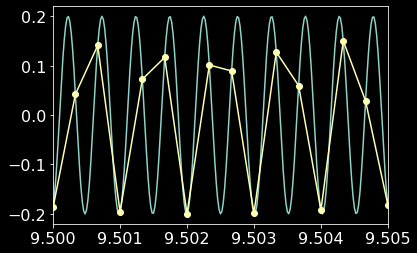

In [11]:
plt.plot(t1,s1)
plt.plot(t2,s2, 'o-')
plt.xlim(9.5,9.5+5e-3)

# 量子化

In [17]:
s = 0.2 * np.cos( 2 * np.pi * 523 * t1 )

In [18]:
IPython.display.Audio(s, rate = sampling_rate1)

In [20]:
# 量子化間隔
d16 = 2/(2**16) # 16 bit 量子化
d8 = 2/(2**8)   # 8 bit 量子化

In [21]:
q16 = np.round(s/d16)*d16
q8 = np.round(s/d8)*d8

In [22]:
IPython.display.Audio(q16, rate = sampling_rate1)

In [23]:
IPython.display.Audio(q8, rate = sampling_rate1)

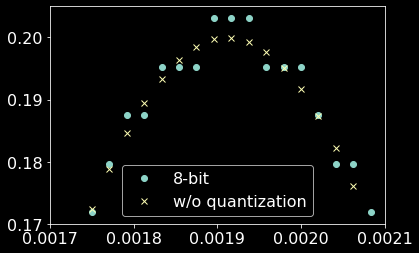

In [ ]:
plt.plot(t1, q8, 'o', label="8-bit")
plt.plot(t1, s, 'x', label="w/o quantization")
plt.xlim(0.0017,0.0021)
plt.ylim(0.17,0.205)
plt.legend()

(0.0, 0.002)

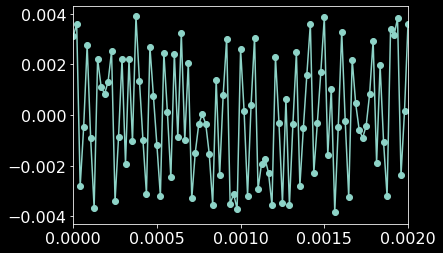

In [ ]:
plt.plot(t1, q8-s, 'o-')
plt.xlim(0, 2e-3)

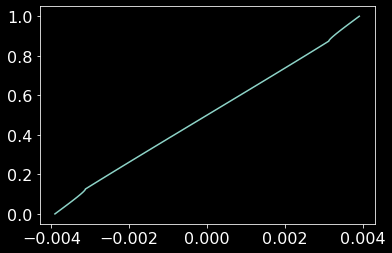

In [ ]:
# Empirical cdf (経験cdf)
q8s = np.sort(q8-s)
y = np.arange(q8s.size)/q8s.size
plt.plot(q8s, y)

ほぼ一様

(0.0, 0.002)

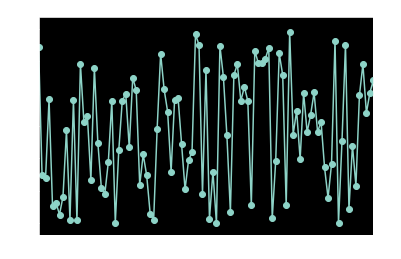

In [ ]:
plt.plot(t1, q16-s, 'o-')
plt.xlim(0, 2e-3)

In [ ]:
IPython.display.Audio(q8-s, rate = sampling_rate1)

In [ ]:
IPython.display.Audio(q16-s, rate = sampling_rate1)

### 要確認事項

なぜ音が大きくなる？